In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Ausschalten von Warnungen

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Daten importieren und Dataframe erstellen

In [3]:
url = (
    "http://biostat.mc.vanderbilt.edu/"
    "wiki/pub/Main/DataSets/titanic3.xls"
)
df = pd.read_excel(url)
orig_df = df

In [4]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# Datenverständnis

## Datentypen der Spalten des Dataframes

In [5]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Anzahl der Zeilen und Spalten

In [6]:
df.shape

(1309, 14)

## Ersten 5 Zeilen

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Beschreibende Statistik der numerischen Attibute

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Datentype und Anzahl der Werte in jeder Spalte

## Daten visualieren

### Import von Matplotlib

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

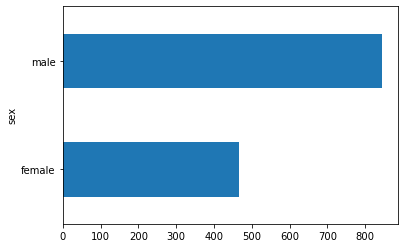

In [10]:
df.groupby(['sex']).size().plot(kind='barh')
plt.show()

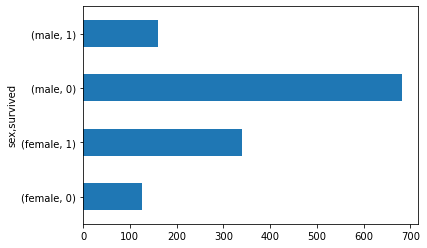

In [11]:
df.groupby(['sex', 'survived']).size().plot(kind='barh')
plt.show()

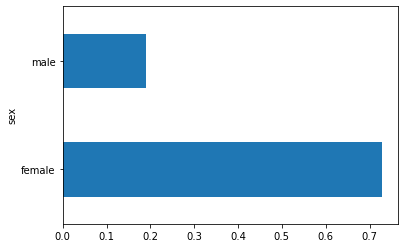

In [12]:
df.groupby(['sex'])['survived'].mean().plot(kind='barh')
plt.show()

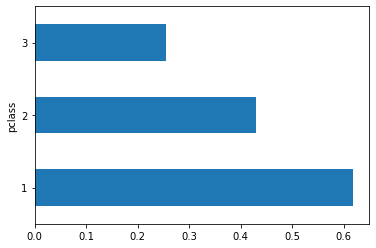

In [13]:
df.groupby(['pclass'])['survived'].mean().plot(kind='barh')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Prozentsatz der fehlenden Werte in jeder Spalte

In [15]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

## Visualisierung der fehlenden Werte

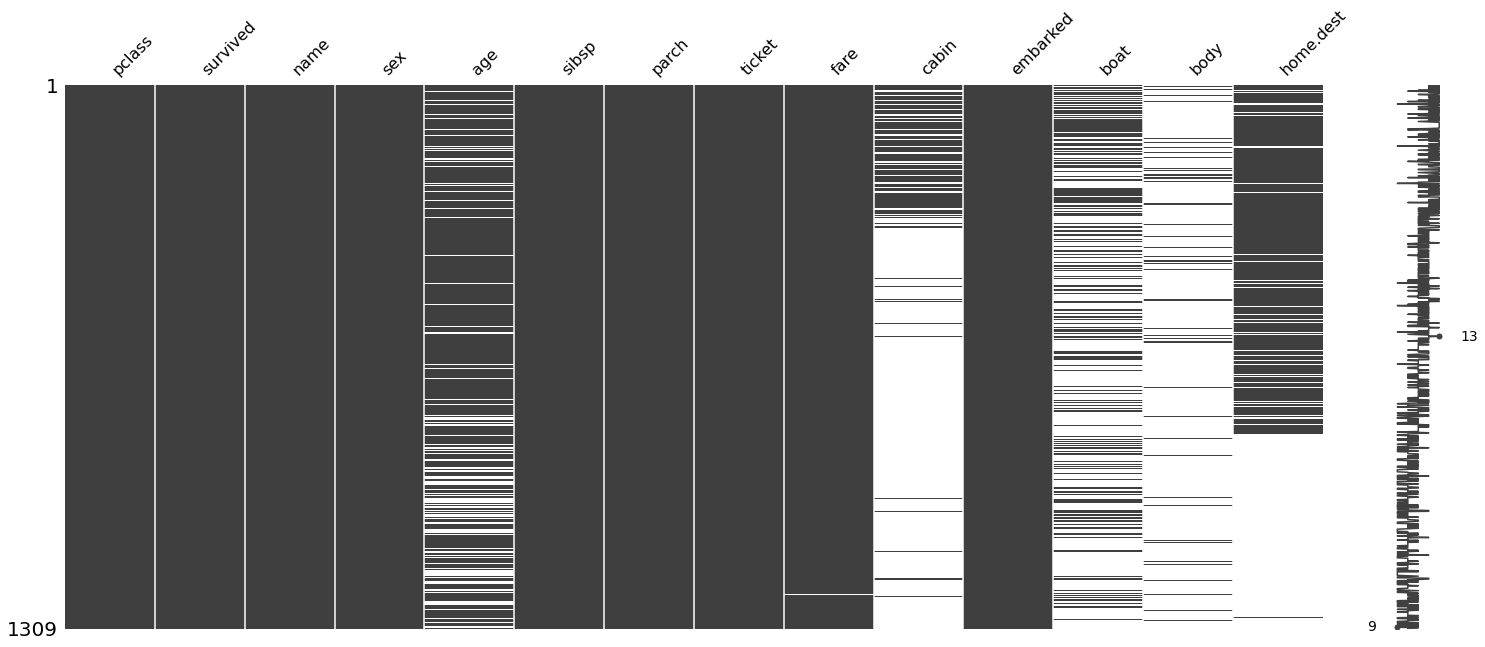

In [16]:
import missingno as msno
msno.matrix(df)

## Balkendiagramm der fehlenden Werte je Spalte

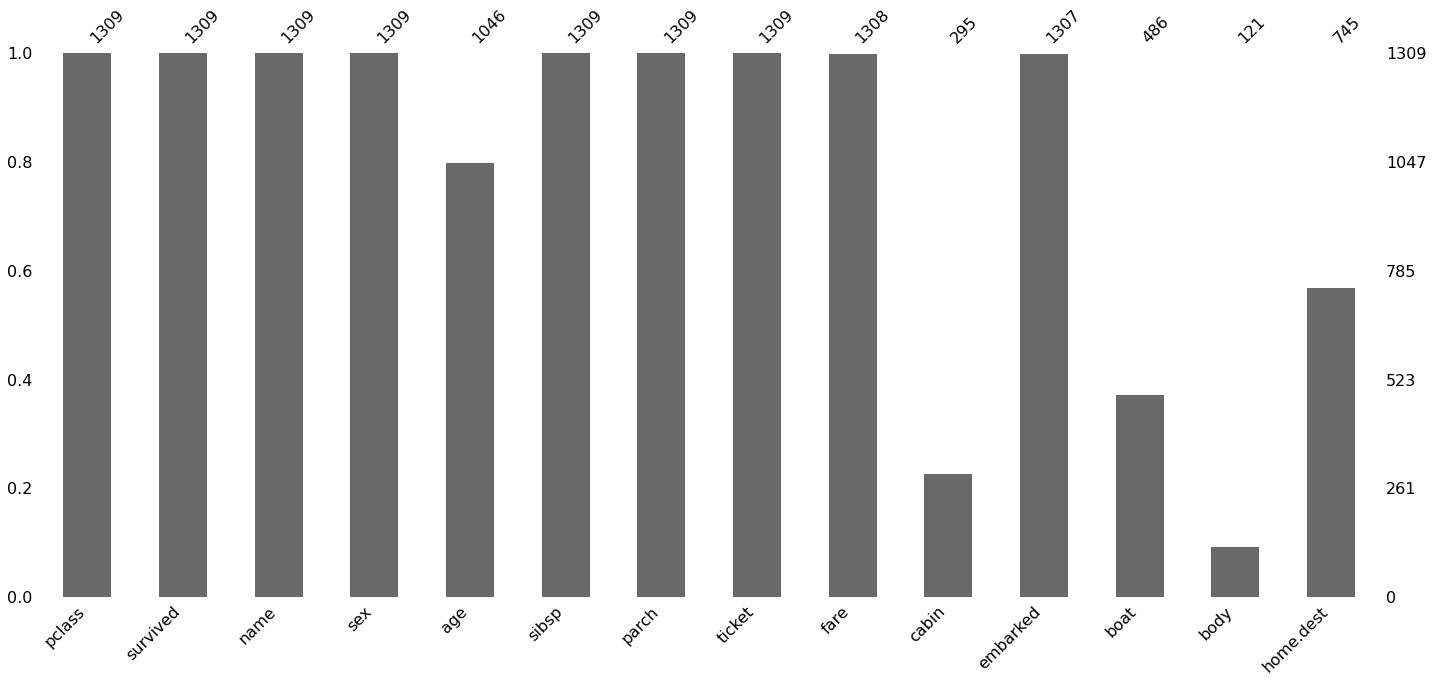

In [17]:
msno.bar(orig_df)

## Korrelation der fehlenden Werte

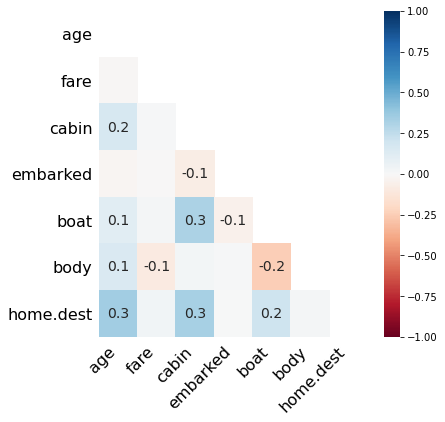

In [18]:
msno.heatmap(df, figsize=(6, 6))

# Datentransformation

## Spalten entfernen

In [19]:
columns_to_drop = ['home.dest', 'body', 'boat', 'embarked', 'cabin', 'name', 'ticket']
df_droped = df.drop(columns= columns_to_drop)

## Erste 5 Zeilen

In [20]:
df_droped.head(5)

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


## Analyse der fehlenden Daten

In [21]:
df_droped.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

## Imputation (Vervollständigung) von fehlenden Werten

In [22]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='median')  
df_droped[['fare', 'age']] = im.fit_transform(df_droped[['fare', 'age']])

## Erste 5 Zeilen

In [23]:
df_droped.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


## Analyse der fehlenden Werte

In [24]:
df_droped.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## Datentype und Anzahl der Werte in jeder Spalte

In [25]:
df_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


Wir haben als Attribute Geschlecht eine kategorische Variable als String. Diese muss noch in eine Dummy Variable umgewandelt werden.

In [26]:
df_droped.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


## Umwandlung von kategorischen Variablen in one-hot-encoded Variablen (Dummy Variablen)

In [27]:
pd.get_dummies(df_droped)

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male
0,1,1,29.0000,0,0,211.3375,1,0
1,1,1,0.9167,1,2,151.5500,0,1
2,1,0,2.0000,1,2,151.5500,1,0
3,1,0,30.0000,1,2,151.5500,0,1
4,1,0,25.0000,1,2,151.5500,1,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,1,0
1305,3,0,28.0000,1,0,14.4542,1,0
1306,3,0,26.5000,0,0,7.2250,0,1
1307,3,0,27.0000,0,0,7.2250,0,1


In [28]:
cleaned_data = pd.get_dummies(df_droped, drop_first=True)

Geschlecht wurde in Dummy Variable umgewandelt

In [29]:
cleaned_data.head()

,pclass,survived,age,sibsp,parch,fare,sex_male
0,1,1,29.0000,0,0,211.3375,0
1,1,1,0.9167,1,2,151.5500,1
2,1,0,2.0000,1,2,151.5500,0
3,1,0,30.0000,1,2,151.5500,1
4,1,0,25.0000,1,2,151.5500,0


## Aufteilung in Features (X) und Label (y)

In [30]:
X = cleaned_data[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']]

In [31]:
X

,pclass,age,sibsp,parch,fare,sex_male
0,1,29.0000,0,0,211.3375,0
1,1,0.9167,1,2,151.5500,1
2,1,2.0000,1,2,151.5500,0
3,1,30.0000,1,2,151.5500,1
4,1,25.0000,1,2,151.5500,0
...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,0
1305,3,28.0000,1,0,14.4542,0
1306,3,26.5000,0,0,7.2250,1
1307,3,27.0000,0,0,7.2250,1


In [32]:
y = cleaned_data['survived']

In [33]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

# Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entscheidungsbaum definieren

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=1, max_depth=3)

# Entscheidungsbaum trainieren

In [36]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

# Klassifikationsgenauigkeit

In [37]:
clf.score(X_test, y_test)

0.8142493638676844

# Klassifikationsbaum darstellen

[Text(558.0, 951.3000000000001, 'sex_male <= 0.5\ngini = 0.462\nsamples = 916\nvalue = [585, 331]\nclass = dead'),
 Text(279.0, 679.5, 'pclass <= 2.5\ngini = 0.424\nsamples = 324\nvalue = [99, 225]\nclass = survived'),
 Text(139.5, 407.70000000000005, 'fare <= 32.09\ngini = 0.124\nsamples = 166\nvalue = [11, 155]\nclass = survived'),
 Text(69.75, 135.89999999999998, 'gini = 0.23\nsamples = 68\nvalue = [9, 59]\nclass = survived'),
 Text(209.25, 135.89999999999998, 'gini = 0.04\nsamples = 98\nvalue = [2, 96]\nclass = survived'),
 Text(418.5, 407.70000000000005, 'fare <= 22.904\ngini = 0.494\nsamples = 158\nvalue = [88, 70]\nclass = dead'),
 Text(348.75, 135.89999999999998, 'gini = 0.499\nsamples = 129\nvalue = [62, 67]\nclass = survived'),
 Text(488.25, 135.89999999999998, 'gini = 0.185\nsamples = 29\nvalue = [26, 3]\nclass = dead'),
 Text(837.0, 679.5, 'age <= 9.5\ngini = 0.294\nsamples = 592\nvalue = [486, 106]\nclass = dead'),
 Text(697.5, 407.70000000000005, 'sibsp <= 2.0\ngini = 0.4

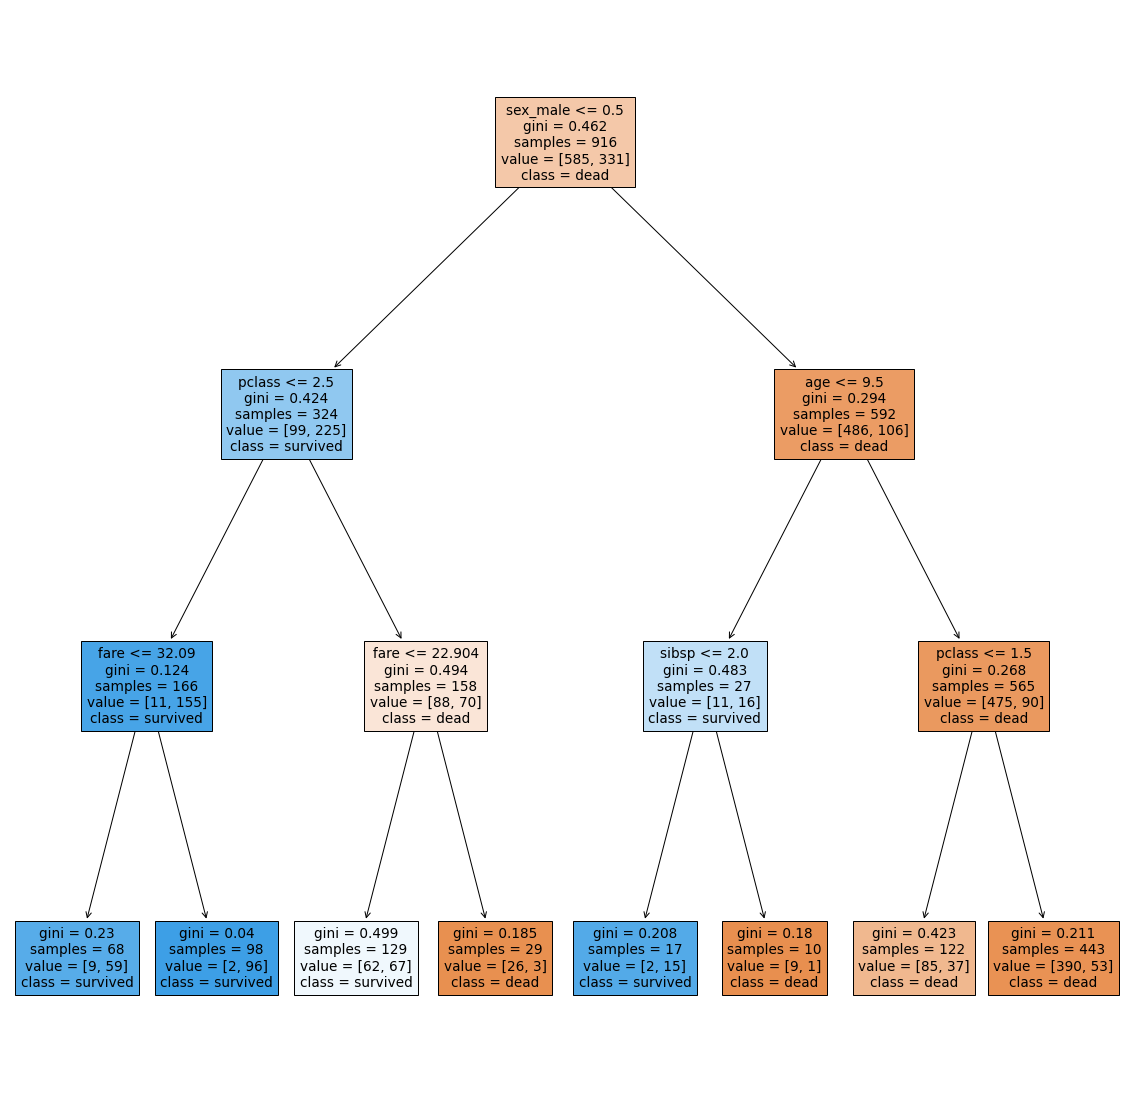

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(clf,feature_names=X_train.columns, class_names=['dead', 'survived'], filled = True)


# dtreeviz installieren

In [39]:
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-0.8.2-py3-none-any.whl size=24501 sha256=723d6757e24733d685b1e1f44bb3ba8bf94b8cf8a099dda7185237e2a8a0d597
  Stored in directory: /root/.cache/pip/wheels/2f/a4/af/948fc126ebbf6b01b01fe02c311b326e35bb115a3c6d4bdc90
Successfully built dtreeviz
ERROR: mxnet 1.6.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.14 which is incompatible.
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Mit dtreeviz Klassifikationsbaum darstellen

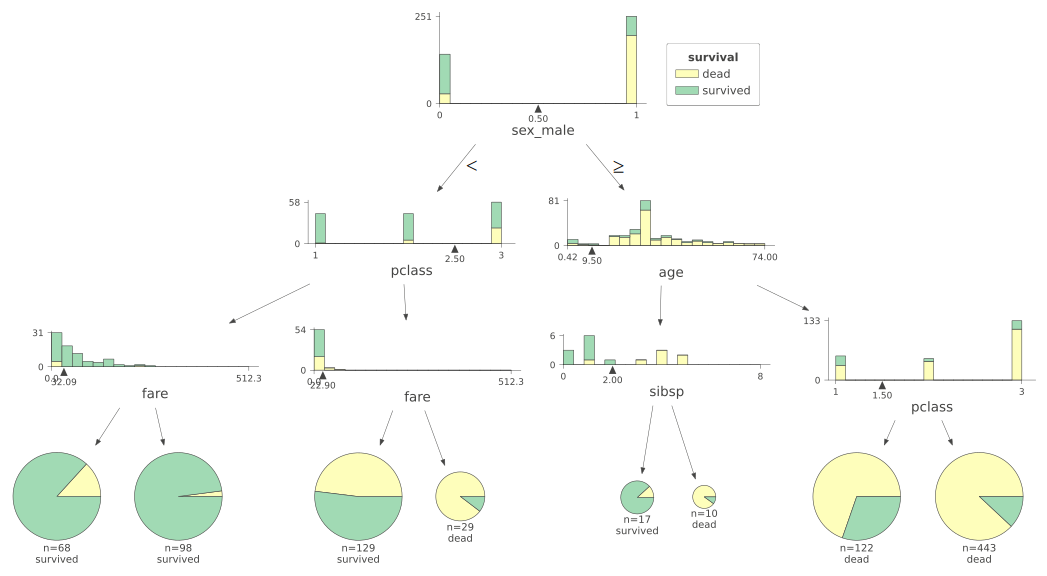

In [40]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(
    clf,
    X_test, 
    y_test,
    target_name="survival",
    feature_names=X_test.columns,
    class_names=['dead', 'survived'],
    scale=1.5
) 
viz

# Wichtigkeit der Features

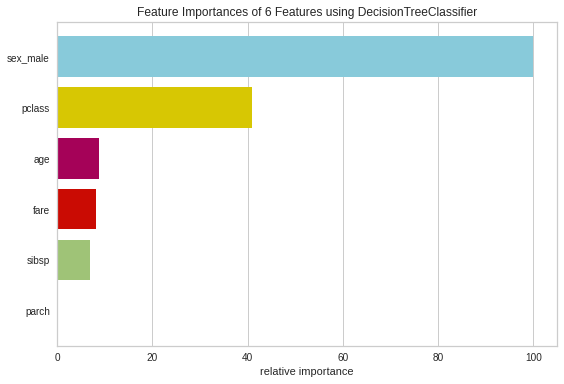

In [41]:
from yellowbrick.model_selection import FeatureImportances
fi_viz = FeatureImportances(clf, labels=X_test.columns)
fi_viz.fit(X_test, y_test)
fi_viz.show()

# Konfusionsmatrix darstellen

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


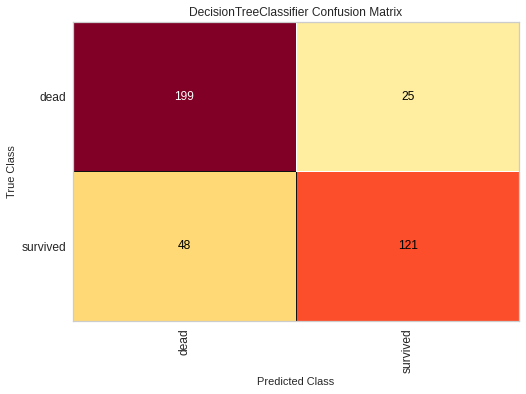

In [42]:
from yellowbrick.classifier import ConfusionMatrix
iris_cm = ConfusionMatrix(
    clf, classes=['dead', 'survived'],
    label_encoder={0: 'dead', 1: 'survived'}
)
iris_cm.score(X_test, y_test)
iris_cm.show()


# Klassen vorhersagen

In [43]:
y_predict = clf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict,target_names=['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.81      0.89      0.85       224
    survived       0.83      0.72      0.77       169

    accuracy                           0.81       393
   macro avg       0.82      0.80      0.81       393
weighted avg       0.82      0.81      0.81       393



# ROC Area Under the Curve (AUC) berechen

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict)

0.8021845942519018

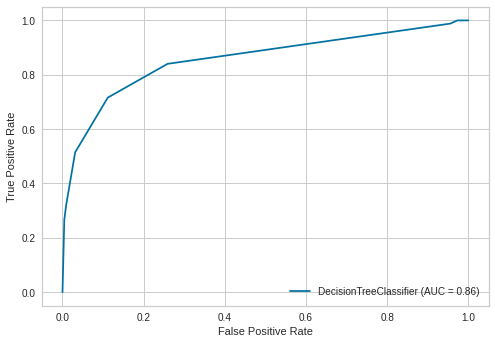

In [46]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


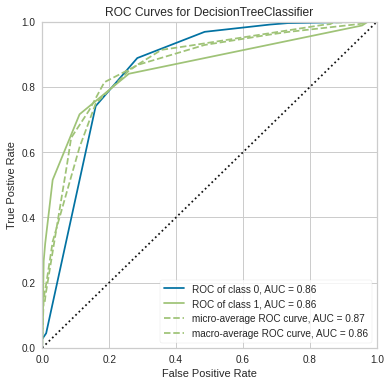

In [47]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(clf)
roc_viz.score(X_test, y_test)
roc_viz.show()

# Precision-Recall Kurve ausgeben

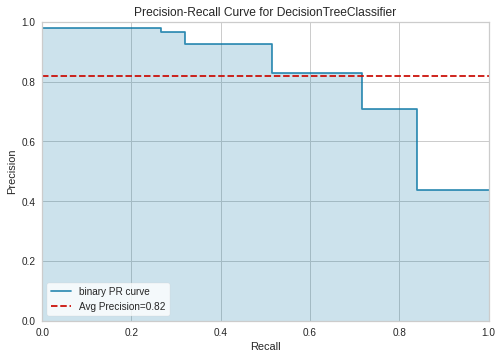

In [48]:
from yellowbrick.classifier import  PrecisionRecallCurve
viz = PrecisionRecallCurve(clf)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# scikit-plot installieren

In [49]:
!pip install scikit-plot


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Wahrscheinlichkeit der Klasse vorhersagen

In [50]:
y_probas = clf.predict_proba(X_test)

# Einfluss der Anzahl der Trainingsdaten auf die Trainings- und Testgenauigkeit

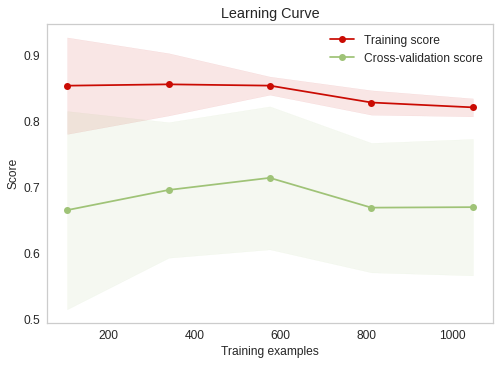

In [51]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(clf, X, y)
plt.show()

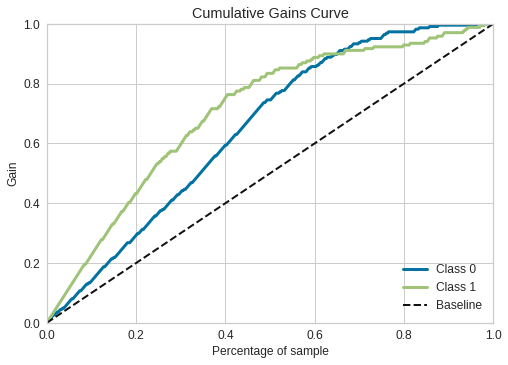

In [52]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

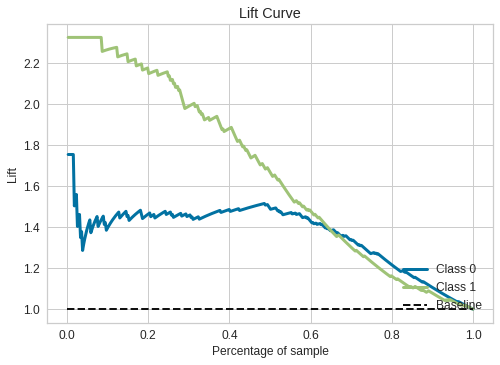

In [53]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

# Verteilung der Klassen

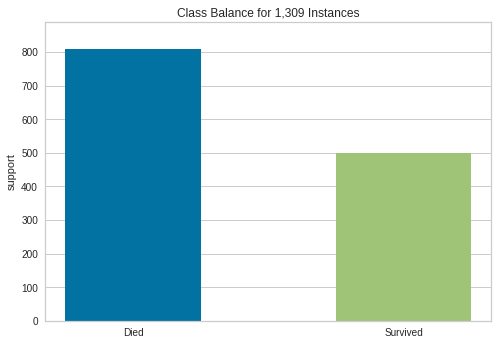

In [54]:
from yellowbrick.classifier import ClassBalance
cb_viz = ClassBalance(labels=["Died", "Survived"])
cb_viz.fit(y)
cb_viz.show()

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


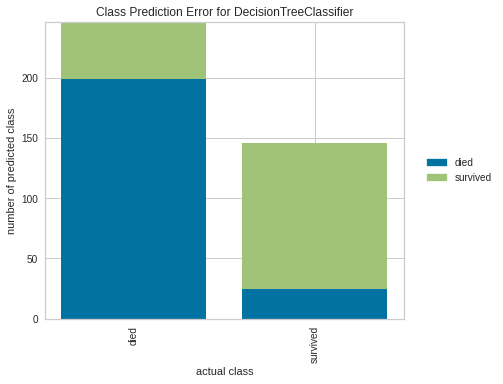

In [55]:
from yellowbrick.classifier import ClassPredictionError
cpe_viz = ClassPredictionError(clf, classes=["died", "survived"])
cpe_viz.score(X_test, y_test)
cpe_viz.poof()

# Einfluss des Schwellwert des Klassenwahrscheinlichkiet auf Klassifikationsgenauigkeit

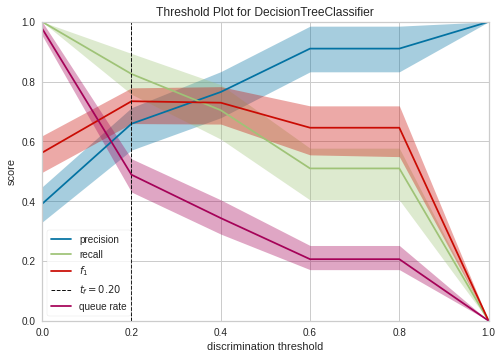

In [56]:
from yellowbrick.classifier import DiscriminationThreshold
dt_viz = DiscriminationThreshold(clf)
dt_viz.fit(X, y)
dt_viz.poof()
plt.show()

# Klassifikationsreport

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


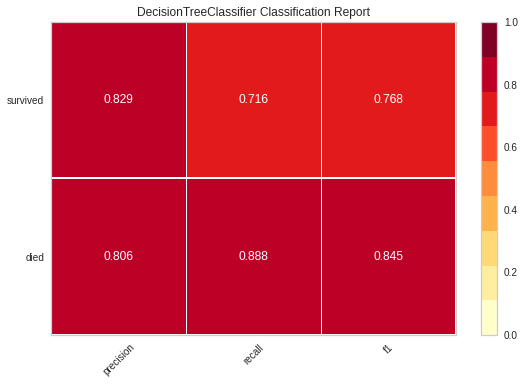

In [57]:
from yellowbrick.classifier import ClassificationReport
mapping = {0: "died", 1: "survived"}
cm_viz = ClassificationReport(clf, classes=["died", "survived"], label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof()
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict,target_names=["died", "survived"]))

              precision    recall  f1-score   support

        died       0.81      0.89      0.85       224
    survived       0.83      0.72      0.77       169

    accuracy                           0.81       393
   macro avg       0.82      0.80      0.81       393
weighted avg       0.82      0.81      0.81       393

